# **Loading the data**

In [5]:
import zipfile
with zipfile.ZipFile('/content/Dev_data_to_be_shared 3.zip','r') as zipref:
  zipref.extractall('/content/extracted')

In [4]:
import pandas as pd
df=pd.read_csv('/content/extracted/Dev_data_to_be_shared.csv')

# **Understanding the data**

In [4]:
print(df.head())

   account_number  bad_flag  onus_attribute_1  transaction_attribute_1  \
0               1         0               NaN                      NaN   
1               2         0          221000.0                      0.0   
2               3         0           25000.0                      0.0   
3               4         0           86000.0                      0.0   
4               5         0          215000.0                      0.0   

   transaction_attribute_2  transaction_attribute_3  transaction_attribute_4  \
0                      NaN                      NaN                      NaN   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   transaction_attribute_5  transaction_attribute_6  transaction_attribute

In [5]:
print(df.tail())

       account_number  bad_flag  onus_attribute_1  transaction_attribute_1  \
96801           96802         0          156000.0                      0.0   
96802           96803         0           46000.0                      0.0   
96803           96804         0           95000.0                      0.0   
96804           96805         0           88000.0                      0.0   
96805           96806         0           94000.0                      0.0   

       transaction_attribute_2  transaction_attribute_3  \
96801                      0.0                      0.0   
96802                      0.0                      0.0   
96803                      0.0                      0.0   
96804                      0.0                      0.0   
96805                      0.0                      0.0   

       transaction_attribute_4  transaction_attribute_5  \
96801                      0.0                      0.0   
96802                      0.0                      0.0   

In [6]:
print(df.shape)

(96806, 1216)


In [7]:
print(df.describe())

       account_number      bad_flag  onus_attribute_1  \
count    96806.000000  96806.000000      7.157500e+04   
mean     48403.500000      0.014173      1.542391e+05   
std      27945.629417      0.118203      1.729925e+05   
min          1.000000      0.000000      2.500000e+04   
25%      24202.250000      0.000000      5.900000e+04   
50%      48403.500000      0.000000      1.000000e+05   
75%      72604.750000      0.000000      1.810000e+05   
max      96806.000000      1.000000      2.800000e+06   

       transaction_attribute_1  transaction_attribute_2  \
count             71575.000000             71575.000000   
mean                  9.570769                 0.002207   
std                1513.967595                 0.119240   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max           

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96806 entries, 0 to 96805
Columns: 1216 entries, account_number to onus_attribute_48
dtypes: float64(1189), int64(27)
memory usage: 898.1 MB
None


In [9]:
print(df.isnull().sum)

<bound method DataFrame.sum of        account_number  bad_flag  onus_attribute_1  transaction_attribute_1  \
0               False     False              True                     True   
1               False     False             False                    False   
2               False     False             False                    False   
3               False     False             False                    False   
4               False     False             False                    False   
...               ...       ...               ...                      ...   
96801           False     False             False                    False   
96802           False     False             False                    False   
96803           False     False             False                    False   
96804           False     False             False                    False   
96805           False     False             False                    False   

       transaction_attribute_2  

In [10]:
for col in df.select_dtypes(include='object').columns:
  print(f'{col}: {df[col].nunique()} unique values')

In [11]:
print(df['bad_flag'].value_counts())

bad_flag
0    95434
1     1372
Name: count, dtype: int64


In [12]:
print(df.corr())

                         account_number  bad_flag  onus_attribute_1  \
account_number                 1.000000 -0.000909         -0.004956   
bad_flag                      -0.000909  1.000000         -0.035641   
onus_attribute_1              -0.004956 -0.035641          1.000000   
transaction_attribute_1        0.001656 -0.000710          0.002688   
transaction_attribute_2        0.003639 -0.001284          0.007575   
...                                 ...       ...               ...   
onus_attribute_44              0.004918  0.075761          0.147998   
onus_attribute_45             -0.009346  0.057981          0.125477   
onus_attribute_46              0.005945  0.078038          0.147633   
onus_attribute_47              0.010282 -0.022821          0.111165   
onus_attribute_48              0.011232 -0.022274          0.107723   

                         transaction_attribute_1  transaction_attribute_2  \
account_number                          0.001656                 0.003

In [13]:
import matplotlib.pyplot as plt

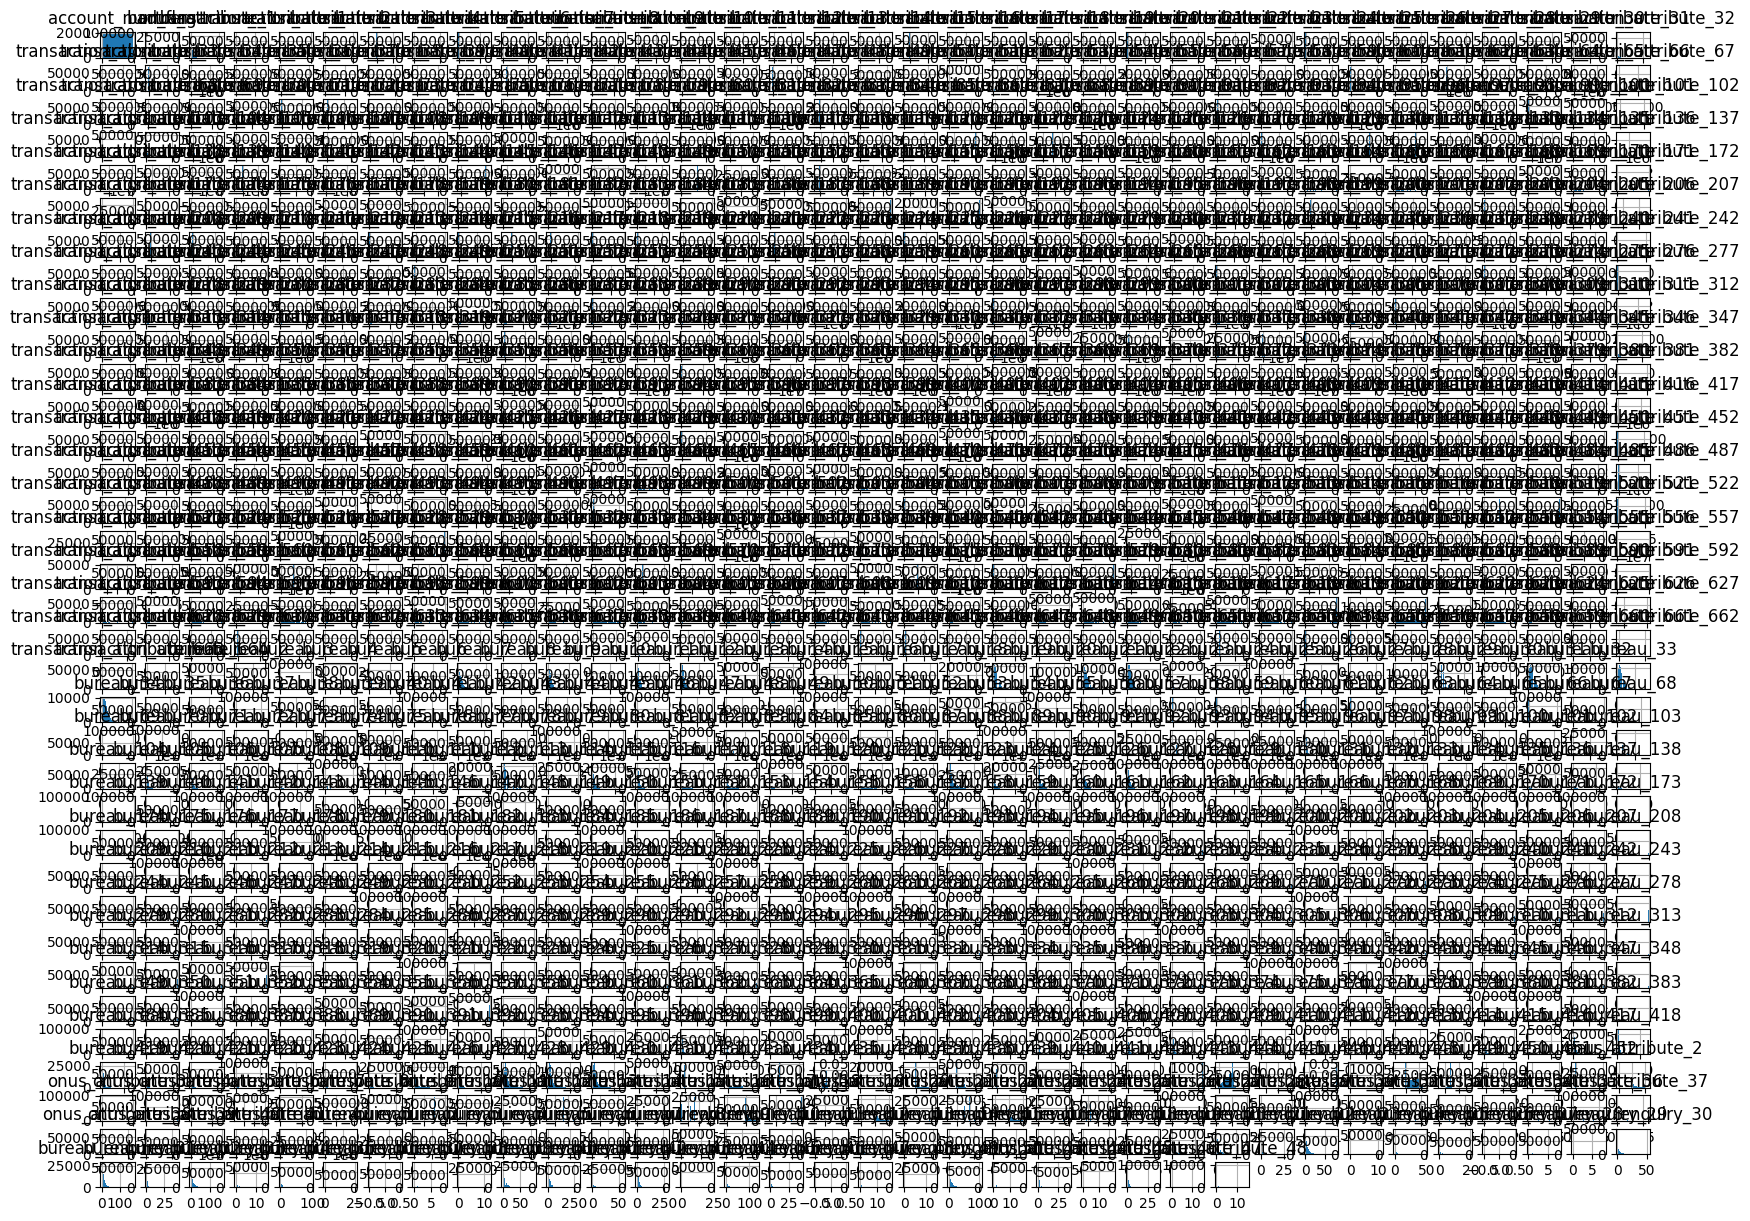

In [17]:
df.hist(bins=50, figsize=(20,15))
plt.show()
#nvm idek why i did this

In [7]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_credit_data(df):
    """
    Analyze credit card behavioral data and generate preprocessing insights

    Parameters:
    df (pandas.DataFrame): Input credit card data

    Returns:
    dict: Analysis results and recommendations
    """
    analysis = {}

    # Basic dataset information
    analysis['basic_info'] = {
        'rows': len(df),
        'columns': len(df.columns),
        'target_distribution': df['bad_flag'].value_counts(normalize=True).to_dict()
    }

    # Missing value analysis
    missing_vals = df.isnull().sum()
    missing_percentages = (missing_vals / len(df)) * 100
    analysis['missing_values'] = {
        'columns_with_missing': missing_vals[missing_vals > 0].to_dict(),
        'high_missing_cols': missing_vals[missing_percentages > 30].index.tolist()
    }

    # Data type analysis
    analysis['dtypes'] = df.dtypes.value_counts().to_dict()

    # Analyze different variable groups
    var_groups = {
        'onus': [col for col in df.columns if col.startswith('onus_attribute')],
        'transaction': [col for col in df.columns if col.startswith('transaction_attribute')],
        'bureau': [col for col in df.columns if col.startswith('bureau') and not col.startswith('bureau_enquiry')],
        'bureau_enquiry': [col for col in df.columns if col.startswith('bureau_enquiry')]
    }

    # Correlation analysis for each group
    analysis['correlations'] = {}
    for group_name, columns in var_groups.items():
        if columns:
            group_df = df[columns + ['bad_flag']]
            correlations = group_df.corr()['bad_flag'].sort_values(ascending=False)
            analysis['correlations'][group_name] = correlations[correlations != 1].head(10).to_dict()

    # Zero variance analysis
    zero_var_cols = []
    for col in df.columns:
        if df[col].nunique() <= 1:
            zero_var_cols.append(col)
    analysis['zero_variance_columns'] = zero_var_cols

    # Identify highly correlated features
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        corr_matrix = df[numeric_cols].corr().abs()
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
        high_corr_pairs = [(col1, col2) for col1, col2 in zip(*np.where(upper > 0.95))]
        analysis['high_correlation_pairs'] = high_corr_pairs

    # Generate preprocessing recommendations
    analysis['preprocessing_recommendations'] = {
        'handle_missing': [
            f"Columns with >30% missing values: Consider dropping or using advanced imputation",
            "For columns with <30% missing values: Use median/mode imputation based on data distribution"
        ],
        'feature_engineering': [
            "Create ratio features for transaction amounts",
            "Calculate utilization ratios from credit limits",
            "Generate time-based features from transaction patterns",
            "Create aggregated bureau metrics"
        ],
        'scaling_encoding': [
            "Use robust scaler for amount-based features to handle outliers",
            "Apply log transformation for highly skewed numerical features",
            "One-hot encode categorical variables if present"
        ]
    }

    return analysis

In [8]:
df = pd.read_csv('/content/extracted/Dev_data_to_be_shared.csv')
analysis_results = analyze_credit_data(df)

In [9]:
print(analysis_results)

{'basic_info': {'rows': 96806, 'columns': 1216, 'target_distribution': {0: 0.9858273247525979, 1: 0.01417267524740202}}, 'missing_values': {'columns_with_missing': {'onus_attribute_1': 25231, 'transaction_attribute_1': 25231, 'transaction_attribute_2': 25231, 'transaction_attribute_3': 25231, 'transaction_attribute_4': 25231, 'transaction_attribute_5': 25231, 'transaction_attribute_6': 25231, 'transaction_attribute_7': 25231, 'transaction_attribute_8': 25231, 'transaction_attribute_9': 25231, 'transaction_attribute_10': 25231, 'transaction_attribute_11': 25231, 'transaction_attribute_12': 25231, 'transaction_attribute_13': 25231, 'transaction_attribute_14': 25231, 'transaction_attribute_15': 25231, 'transaction_attribute_16': 25231, 'transaction_attribute_17': 25231, 'transaction_attribute_18': 25231, 'transaction_attribute_19': 25231, 'transaction_attribute_20': 25231, 'transaction_attribute_21': 25231, 'transaction_attribute_22': 25231, 'transaction_attribute_23': 25231, 'transaction

In [ ]:
'''
{'basic_info': {'rows': 96806, 'columns': 1216, 'target_distribution': {0: 0.9858273247525979, 1: 0.01417267524740202}}, 'missing_values': {'columns_with_missing': {'onus_attribute_1': 25231, 'transaction_attribute_1': 25231, 'transaction_attribute_2': 25231, 'transaction_attribute_3': 25231, 'transaction_attribute_4': 25231, 'transaction_attribute_5': 25231, 'transaction_attribute_6': 25231, 'transaction_attribute_7': 25231, 'transaction_attribute_8': 25231, 'transaction_attribute_9': 25231, 'transaction_attribute_10': 25231, 'transaction_attribute_11': 25231, 'transaction_attribute_12': 25231, 'transaction_attribute_13': 25231, 'transaction_attribute_14': 25231, 'transaction_attribute_15': 25231, 'transaction_attribute_16': 25231, 'transaction_attribute_17': 25231, 'transaction_attribute_18': 25231, 'transaction_attribute_19': 25231, 'transaction_attribute_20': 25231, 'transaction_attribute_21': 25231, 'transaction_attribute_22': 25231, 'transaction_attribute_23': 25231, 'transaction_attribute_24': 25231, 'transaction_attribute_25': 25231, 'transaction_attribute_26': 25231, 'transaction_attribute_27': 25231, 'transaction_attribute_28': 25231, 'transaction_attribute_29': 25231, 'transaction_attribute_30': 25231, 'transaction_attribute_31': 25231, 'transaction_attribute_32': 25231, 'transaction_attribute_33': 25231, 'transaction_attribute_34': 25231, 'transaction_attribute_35': 25231, 'transaction_attribute_36': 25231, 'transaction_attribute_37': 25231, 'transaction_attribute_38': 25231, 'transaction_attribute_39': 25231, 'transaction_attribute_40': 25231, 'transaction_attribute_41': 25231, 'transaction_attribute_42': 25231, 'transaction_attribute_43': 25231, 'transaction_attribute_44': 25231, 'transaction_attribute_45': 25231, 'transaction_attribute_46': 25231, 'transaction_attribute_47': 25231, 'transaction_attribute_48': 25231, 'transaction_attribute_49': 25231, 'transaction_attribute_50': 25231, 'transaction_attribute_51': 25231, 'transaction_attribute_52': 25231, 'transaction_attribute_53': 25231, 'transaction_attribute_54': 25231, 'transaction_attribute_55': 25231, 'transaction_attribute_56': 25231, 'transaction_attribute_57': 25231, 'transaction_attribute_58': 25231, 'transaction_attribute_59': 25231, 'transaction_attribute_60': 25231, 'transaction_attribute_61': 25231, 'transaction_attribute_62': 25231, 'transaction_attribute_63': 25231, 'transaction_attribute_64': 25231, 'transaction_attribute_65': 25231, 'transaction_attribute_66': 25231, 'transaction_attribute_67': 25231, 'transaction_attribute_68': 25231, 'transaction_attribute_69': 25231, 'transaction_attribute_70': 25231, 'transaction_attribute_71': 25231, 'transaction_attribute_72': 25231, 'transaction_attribute_73': 25231, 'transaction_attribute_74': 25231, 'transaction_attribute_75': 25231, 'transaction_attribute_76': 25231, 'transaction_attribute_77': 25231, 'transaction_attribute_78': 25231, 'transaction_attribute_79': 25231, 'transaction_attribute_80': 25231, 'transaction_attribute_81': 25231, 'transaction_attribute_82': 25231, 'transaction_attribute_83': 25231, 'transaction_attribute_84': 25231, 'transaction_attribute_85': 25231, 'transaction_attribute_86': 25231, 'transaction_attribute_87': 25231, 'transaction_attribute_88': 25231, 'transaction_attribute_89': 25231, 'transaction_attribute_90': 25231, 'transaction_attribute_91': 25231, 'transaction_attribute_92': 25231, 'transaction_attribute_93': 25231, 'transaction_attribute_94': 25231, 'transaction_attribute_95': 25231, 'transaction_attribute_96': 25231, 'transaction_attribute_97': 25231, 'transaction_attribute_98': 25231, 'transaction_attribute_99': 25231, 'transaction_attribute_100': 25231, 'transaction_attribute_101': 25231, 'transaction_attribute_102': 25231, 'transaction_attribute_103': 25231, 'transaction_attribute_104': 25231, 'transaction_attribute_105': 25231, 'transaction_attribute_106': 25231, 'transaction_attribute_107': 25231, 'transaction_attribute_108': 25231, 'transaction_attribute_109': 25231, 'transaction_attribute_110': 25231, 'transaction_attribute_111': 25231, 'transaction_attribute_112': 25231, 'transaction_attribute_113': 25231, 'transaction_attribute_114': 25231, 'transaction_attribute_115': 25231, 'transaction_attribute_116': 25231, 'transaction_attribute_117': 25231, 'transaction_attribute_118': 25440, 'transaction_attribute_119': 25440, 'transaction_attribute_120': 25440, 'transaction_attribute_121': 25440, 'transaction_attribute_122': 25440, 'transaction_attribute_123': 25440, 'transaction_attribute_124': 25440, 'transaction_attribute_125': 25440, 'transaction_attribute_126': 25440, 'transaction_attribute_127': 25440, 'transaction_attribute_128': 25440, 'transaction_attribute_129': 25440, 'transaction_attribute_130': 25440, 'transaction_attribute_131': 25440, 'transaction_attribute_132': 25440, 'transaction_attribute_133': 25440, 'transaction_attribute_134': 25440, 'transaction_attribute_135': 25440, 'transaction_attribute_136': 25440, 'transaction_attribute_137': 25440, 'transaction_attribute_138': 25440, 'transaction_attribute_139': 25440, 'transaction_attribute_140': 25440, 'transaction_attribute_141': 25440, 'transaction_attribute_142': 25440, 'transaction_attribute_143': 25440, 'transaction_attribute_144': 25440, 'transaction_attribute_145': 25440, 'transaction_attribute_146': 25440, 'transaction_attribute_147': 25440, 'transaction_attribute_148': 25440, 'transaction_attribute_149': 25440, 'transaction_attribute_150': 25440, 'transaction_attribute_151': 25440, 'transaction_attribute_152': 25440, 'transaction_attribute_153': 25440, 'transaction_attribute_154': 25440, 'transaction_attribute_155': 25440, 'transaction_attribute_156': 25440, 'transaction_attribute_157': 25231, 'transaction_attribute_158': 25231, 'transaction_attribute_159': 25231, 'transaction_attribute_160': 25231, 'transaction_attribute_161': 25231, 'transaction_attribute_162': 25231, 'transaction_attribute_163': 25231, 'transaction_attribute_164': 25231, 'transaction_attribute_165': 25231, 'transaction_attribute_166': 25231, 'transaction_attribute_167': 25231, 'transaction_attribute_168': 25231, 'transaction_attribute_169': 25231, 'transaction_attribute_170': 25231, 'transaction_attribute_171': 25231, 'transaction_attribute_172': 25231, 'transaction_attribute_173': 25231, 'transaction_attribute_174': 25231, 'transaction_attribute_175': 25231, 'transaction_attribute_176': 25231, 'transaction_attribute_177': 25231, 'transaction_attribute_178': 25231, 'transaction_attribute_179': 25231, 'transaction_attribute_180': 25231, 'transaction_attribute_181': 25231, 'transaction_attribute_182': 25231, 'transaction_attribute_183': 25231, 'transaction_attribute_184': 25231, 'transaction_attribute_185': 25231, 'transaction_attribute_186': 25231, 'transaction_attribute_187': 25231, 'transaction_attribute_188': 25231, 'transaction_attribute_189': 25231, 'transaction_attribute_190': 25231, 'transaction_attribute_191': 25231, 'transaction_attribute_192': 25231, 'transaction_attribute_193': 25231, 'transaction_attribute_194': 25231, 'transaction_attribute_195': 25231, 'transaction_attribute_196': 25231, 'transaction_attribute_197': 25231, 'transaction_attribute_198': 25231, 'transaction_attribute_199': 25231, 'transaction_attribute_200': 25231, 'transaction_attribute_201': 25231, 'transaction_attribute_202': 25231, 'transaction_attribute_203': 25231, 'transaction_attribute_204': 25231, 'transaction_attribute_205': 25231, 'transaction_attribute_206': 25231, 'transaction_attribute_207': 25231, 'transaction_attribute_208': 25231, 'transaction_attribute_209': 25231, 'transaction_attribute_210': 25231, 'transaction_attribute_211': 25231, 'transaction_attribute_212': 25231, 'transaction_attribute_213': 25231, 'transaction_attribute_214': 25231, 'transaction_attribute_215': 25231, 'transaction_attribute_216': 25231, 'transaction_attribute_217': 25231, 'transaction_attribute_218': 25231, 'transaction_attribute_219': 25231, 'transaction_attribute_220': 25231, 'transaction_attribute_221': 25231, 'transaction_attribute_222': 25231, 'transaction_attribute_223': 25231, 'transaction_attribute_224': 25231, 'transaction_attribute_225': 25231, 'transaction_attribute_226': 25231, 'transaction_attribute_227': 25231, 'transaction_attribute_228': 25231, 'transaction_attribute_229': 25231, 'transaction_attribute_230': 25231, 'transaction_attribute_231': 25231, 'transaction_attribute_232': 25231, 'transaction_attribute_233': 25231, 'transaction_attribute_234': 25231, 'transaction_attribute_235': 25231, 'transaction_attribute_236': 25231, 'transaction_attribute_237': 25231, 'transaction_attribute_238': 25231, 'transaction_attribute_239': 25231, 'transaction_attribute_240': 25231, 'transaction_attribute_241': 25231, 'transaction_attribute_242': 25231, 'transaction_attribute_243': 25231, 'transaction_attribute_244': 25231, 'transaction_attribute_245': 25231, 'transaction_attribute_246': 25231, 'transaction_attribute_247': 25231, 'transaction_attribute_248': 25231, 'transaction_attribute_249': 25231, 'transaction_attribute_250': 25231, 'transaction_attribute_251': 25231, 'transaction_attribute_252': 25231, 'transaction_attribute_253': 25231, 'transaction_attribute_254': 25231, 'transaction_attribute_255': 25231, 'transaction_attribute_256': 25231, 'transaction_attribute_257': 25231, 'transaction_attribute_258': 25231, 'transaction_attribute_259': 25231, 'transaction_attribute_260': 25231, 'transaction_attribute_261': 25231, 'transaction_attribute_262': 25231, 'transaction_attribute_263': 25231, 'transaction_attribute_264': 25231, 'transaction_attribute_265': 25231, 'transaction_attribute_266': 25231, 'transaction_attribute_267': 25231, 'transaction_attribute_268': 25231, 'transaction_attribute_269': 25231, 'transaction_attribute_270': 25231, 'transaction_attribute_271': 25231, 'transaction_attribute_272': 25231, 'transaction_attribute_273': 25231, 'transaction_attribute_274': 25231, 'transaction_attribute_275': 25231, 'transaction_attribute_276': 25231, 'transaction_attribute_277': 25231, 'transaction_attribute_278': 25231, 'transaction_attribute_279': 25231, 'transaction_attribute_280': 25231, 'transaction_attribute_281': 25231, 'transaction_attribute_282': 25231, 'transaction_attribute_283': 25231, 'transaction_attribute_284': 25231, 'transaction_attribute_285': 25231, 'transaction_attribute_286': 25231, 'transaction_attribute_287': 25231, 'transaction_attribute_288': 25231, 'transaction_attribute_289': 25231, 'transaction_attribute_290': 25231, 'transaction_attribute_291': 25231, 'transaction_attribute_292': 25231, 'transaction_attribute_293': 25231, 'transaction_attribute_294': 25231, 'transaction_attribute_295': 25231, 'transaction_attribute_296': 25231, 'transaction_attribute_297': 25231, 'transaction_attribute_298': 25231, 'transaction_attribute_299': 25231, 'transaction_attribute_300': 25231, 'transaction_attribute_301': 25231, 'transaction_attribute_302': 25231, 'transaction_attribute_303': 25231, 'transaction_attribute_304': 25231, 'transaction_attribute_305': 25231, 'transaction_attribute_306': 25231, 'transaction_attribute_307': 25231, 'transaction_attribute_308': 25231, 'transaction_attribute_309': 25231, 'transaction_attribute_310': 25231, 'transaction_attribute_311': 25231, 'transaction_attribute_312': 25231, 'transaction_attribute_313': 25231, 'transaction_attribute_314': 25231, 'transaction_attribute_315': 25231, 'transaction_attribute_316': 25231, 'transaction_attribute_317': 25231, 'transaction_attribute_318': 25231, 'transaction_attribute_319': 25231, 'transaction_attribute_320': 25231, 'transaction_attribute_321': 25231, 'transaction_attribute_322': 25231, 'transaction_attribute_323': 25231, 'transaction_attribute_324': 25231, 'transaction_attribute_325': 25231, 'transaction_attribute_326': 25231, 'transaction_attribute_327': 25231, 'transaction_attribute_328': 25231, 'transaction_attribute_329': 25231, 'transaction_attribute_330': 25231, 'transaction_attribute_331': 25231, 'transaction_attribute_332': 25231, 'transaction_attribute_333': 25231, 'transaction_attribute_334': 25231, 'transaction_attribute_335': 25231, 'transaction_attribute_336': 25231, 'transaction_attribute_337': 25231, 'transaction_attribute_338': 25231, 'transaction_attribute_339': 25231, 'transaction_attribute_340': 25231, 'transaction_attribute_341': 25231, 'transaction_attribute_342': 25231, 'transaction_attribute_343': 25231, 'transaction_attribute_344': 25231, 'transaction_attribute_345': 25231, 'transaction_attribute_346': 25231, 'transaction_attribute_347': 25231, 'transaction_attribute_348': 25231, 'transaction_attribute_349': 25231, 'transaction_attribute_350': 25231, 'transaction_attribute_351': 25231, 'transaction_attribute_352': 25231, 'transaction_attribute_353': 25231, 'transaction_attribute_354': 25310, 'transaction_attribute_355': 25231, 'transaction_attribute_356': 25231, 'transaction_attribute_357': 25231, 'transaction_attribute_358': 25231, 'transaction_attribute_359': 25310, 'transaction_attribute_360': 25231, 'transaction_attribute_361': 25231, 'transaction_attribute_362': 25231, 'transaction_attribute_363': 25231, 'transaction_attribute_364': 25310, 'transaction_attribute_365': 25231, 'transaction_attribute_366': 25231, 'transaction_attribute_367': 25231, 'transaction_attribute_368': 25231, 'transaction_attribute_369': 25310, 'transaction_attribute_370': 25231, 'transaction_attribute_371': 25231, 'transaction_attribute_372': 25231, 'transaction_attribute_373': 25231, 'transaction_attribute_374': 25310, 'transaction_attribute_375': 25231, 'transaction_attribute_376': 25231, 'transaction_attribute_377': 25231, 'transaction_attribute_378': 25231, 'transaction_attribute_379': 25310, 'transaction_attribute_380': 25231, 'transaction_attribute_381': 25231, 'transaction_attribute_382': 25231, 'transaction_attribute_383': 25231, 'transaction_attribute_384': 25310, 'transaction_attribute_385': 25231, 'transaction_attribute_386': 25231, 'transaction_attribute_387': 25231, 'transaction_attribute_388': 25231, 'transaction_attribute_389': 25310, 'transaction_attribute_390': 25231, 'transaction_attribute_391': 25231, 'transaction_attribute_392': 25231, 'transaction_attribute_393': 25231, 'transaction_attribute_394': 25310, 'transaction_attribute_395': 25231, 'transaction_attribute_396': 25231, 'transaction_attribute_397': 25231, 'transaction_attribute_398': 25231, 'transaction_attribute_399': 25310, 'transaction_attribute_400': 25231, 'transaction_attribute_401': 25231, 'transaction_attribute_402': 25231, 'transaction_attribute_403': 25231, 'transaction_attribute_404': 25310, 'transaction_attribute_405': 25231, 'transaction_attribute_406': 25231, 'transaction_attribute_407': 25231, 'transaction_attribute_408': 25231, 'transaction_attribute_409': 25310, 'transaction_attribute_410': 25231, 'transaction_attribute_411': 25231, 'transaction_attribute_412': 25231, 'transaction_attribute_413': 25231, 'transaction_attribute_414': 25310, 'transaction_attribute_415': 25231, 'transaction_attribute_416': 25231, 'transaction_attribute_417': 25231, 'transaction_attribute_418': 25231, 'transaction_attribute_419': 25310, 'transaction_attribute_420': 25231, 'transaction_attribute_421': 25231, 'transaction_attribute_422': 25231, 'transaction_attribute_423': 25231, 'transaction_attribute_424': 25310, 'transaction_attribute_425': 25231, 'transaction_attribute_426': 25231, 'transaction_attribute_427': 25231, 'transaction_attribute_428': 25231, 'transaction_attribute_429': 25310, 'transaction_attribute_430': 25231, 'transaction_attribute_431': 25231, 'transaction_attribute_432': 25231, 'transaction_attribute_433': 25231, 'transaction_attribute_434': 25310, 'transaction_attribute_435': 25231, 'transaction_attribute_436': 25231, 'transaction_attribute_437': 25231, 'transaction_attribute_438': 25231, 'transaction_attribute_439': 25310, 'transaction_attribute_440': 25231, 'transaction_attribute_441': 25231, 'transaction_attribute_442': 25231, 'transaction_attribute_443': 25231, 'transaction_attribute_444': 25310, 'transaction_attribute_445': 25231, 'transaction_attribute_446': 25231, 'transaction_attribute_447': 25231, 'transaction_attribute_448': 25231, 'transaction_attribute_449': 25310, 'transaction_attribute_450': 25231, 'transaction_attribute_451': 25231, 'transaction_attribute_452': 25231, 'transaction_attribute_453': 25231, 'transaction_attribute_454': 25310, 'transaction_attribute_455': 25231, 'transaction_attribute_456': 25231, 'transaction_attribute_457': 25231, 'transaction_attribute_458': 25231, 'transaction_attribute_459': 25310, 'transaction_attribute_460': 25231, 'transaction_attribute_461': 25231, 'transaction_attribute_462': 25231, 'transaction_attribute_463': 25231, 'transaction_attribute_464': 25310, 'transaction_attribute_465': 25231, 'transaction_attribute_466': 25231, 'transaction_attribute_467': 25231, 'transaction_attribute_468': 25231, 'transaction_attribute_469': 25310, 'transaction_attribute_470': 25231, 'transaction_attribute_471': 25231, 'transaction_attribute_472': 25231, 'transaction_attribute_473': 25231, 'transaction_attribute_474': 25310, 'transaction_attribute_475': 25231, 'transaction_attribute_476': 25231, 'transaction_attribute_477': 25231, 'transaction_attribute_478': 25231, 'transaction_attribute_479': 25310, 'transaction_attribute_480': 25231, 'transaction_attribute_481': 25231, 'transaction_attribute_482': 25231, 'transaction_attribute_483': 25231, 'transaction_attribute_484': 25310, 'transaction_attribute_485': 25231, 'transaction_attribute_486': 25231, 'transaction_attribute_487': 25231, 'transaction_attribute_488': 25231, 'transaction_attribute_489': 25310, 'transaction_attribute_490': 25231, 'transaction_attribute_491': 25231, 'transaction_attribute_492': 25231, 'transaction_attribute_493': 25231, 'transaction_attribute_494': 25310, 'transaction_attribute_495': 25231, 'transaction_attribute_496': 25231, 'transaction_attribute_497': 25231, 'transaction_attribute_498': 25231, 'transaction_attribute_499': 25310, 'transaction_attribute_500': 25231, 'transaction_attribute_501': 25231, 'transaction_attribute_502': 25231, 'transaction_attribute_503': 25231, 'transaction_attribute_504': 25310, 'transaction_attribute_505': 25231, 'transaction_attribute_506': 25231, 'transaction_attribute_507': 25231, 'transaction_attribute_508': 25231, 'transaction_attribute_509': 25310, 'transaction_attribute_510': 25231, 'transaction_attribute_511': 25231, 'transaction_attribute_512': 25231, 'transaction_attribute_513': 25231, 'transaction_attribute_514': 25310, 'transaction_attribute_515': 25231, 'transaction_attribute_516': 25231, 'transaction_attribute_517': 25231, 'transaction_attribute_518': 25231, 'transaction_attribute_519': 25310, 'transaction_attribute_520': 25231, 'transaction_attribute_521': 25231, 'transaction_attribute_522': 25231, 'transaction_attribute_523': 25231, 'transaction_attribute_524': 25310, 'transaction_attribute_525': 25231, 'transaction_attribute_526': 25231, 'transaction_attribute_527': 25231, 'transaction_attribute_528': 25231, 'transaction_attribute_529': 25310, 'transaction_attribute_530': 25231, 'transaction_attribute_531': 25231, 'transaction_attribute_532': 25231, 'transaction_attribute_533': 25231, 'transaction_attribute_534': 25310, 'transaction_attribute_535': 25231, 'transaction_attribute_536': 25231, 'transaction_attribute_537': 25231, 'transaction_attribute_538': 25231, 'transaction_attribute_539': 25310, 'transaction_attribute_540': 25231, 'transaction_attribute_541': 25231, 'transaction_attribute_542': 25231, 'transaction_attribute_543': 25231, 'transaction_attribute_544': 25310, 'transaction_attribute_545': 25231, 'transaction_attribute_546': 25231, 'transaction_attribute_547': 25231, 'transaction_attribute_548': 25335, 'transaction_attribute_549': 25335, 'transaction_attribute_550': 25335, 'transaction_attribute_551': 25335, 'transaction_attribute_552': 25335, 'transaction_attribute_553': 25335, 'transaction_attribute_554': 25335, 'transaction_attribute_555': 25335, 'transaction_attribute_556': 25335, 'transaction_attribute_557': 25335, 'transaction_attribute_558': 25335, 'transaction_attribute_559': 25335, 'transaction_attribute_560': 25335, 'transaction_attribute_561': 25335, 'transaction_attribute_562': 25335, 'transaction_attribute_563': 25335, 'transaction_attribute_564': 25335, 'transaction_attribute_565': 25335, 'transaction_attribute_566': 25335, 'transaction_attribute_567': 25335, 'transaction_attribute_568': 25335, 'transaction_attribute_569': 25335, 'transaction_attribute_570': 25335, 'transaction_attribute_571': 25335, 'transaction_attribute_572': 25335, 'transaction_attribute_573': 25335, 'transaction_attribute_574': 25335, 'transaction_attribute_575': 25335, 'transaction_attribute_576': 25335, 'transaction_attribute_577': 25335, 'transaction_attribute_578': 25335, 'transaction_attribute_579': 25335, 'transaction_attribute_580': 25335, 'transaction_attribute_581': 25335, 'transaction_attribute_582': 25335, 'transaction_attribute_583': 25335, 'transaction_attribute_584': 25335, 'transaction_attribute_585': 25335, 'transaction_attribute_586': 25335, 'transaction_attribute_587': 25231, 'transaction_attribute_588': 25231, 'transaction_attribute_589': 25231, 'transaction_attribute_590': 25231, 'transaction_attribute_591': 25231, 'transaction_attribute_592': 25231, 'transaction_attribute_593': 25231, 'transaction_attribute_594': 25231, 'transaction_attribute_595': 25231, 'transaction_attribute_596': 25231, 'transaction_attribute_597': 25231, 'transaction_attribute_598': 25231, 'transaction_attribute_599': 25231, 'transaction_attribute_600': 25231, 'transaction_attribute_601': 25231, 'transaction_attribute_602': 25231, 'transaction_attribute_603': 25231, 'transaction_attribute_604': 25231, 'transaction_attribute_605': 25231, 'transaction_attribute_606': 25231, 'transaction_attribute_607': 25231, 'transaction_attribute_608': 25231, 'transaction_attribute_609': 25231, 'transaction_attribute_610': 25231, 'transaction_attribute_611': 25231, 'transaction_attribute_612': 25231, 'transaction_attribute_613': 25231, 'transaction_attribute_614': 25231, 'transaction_attribute_615': 25231, 'transaction_attribute_616': 25231, 'transaction_attribute_617': 25231, 'transaction_attribute_618': 25231, 'transaction_attribute_619': 25231, 'transaction_attribute_620': 25231, 'transaction_attribute_621': 25231, 'transaction_attribute_622': 25231, 'transaction_attribute_623': 25231, 'transaction_attribute_624': 25231, 'transaction_attribute_625': 25231, 'transaction_attribute_626': 25231, 'transaction_attribute_627': 25231, 'transaction_attribute_628': 25231, 'transaction_attribute_629': 25231, 'transaction_attribute_630': 25231, 'transaction_attribute_631': 25231, 'transaction_attribute_632': 25231, 'transaction_attribute_633': 25231, 'transaction_attribute_634': 25231, 'transaction_attribute_635': 25231, 'transaction_attribute_636': 25231, 'transaction_attribute_637': 25231, 'transaction_attribute_638': 25231, 'transaction_attribute_639': 25231, 'transaction_attribute_640': 25231, 'transaction_attribute_641': 25231, 'transaction_attribute_642': 25231, 'transaction_attribute_643': 25231, 'transaction_attribute_644': 25231, 'transaction_attribute_645': 25231, 'transaction_attribute_646': 25231, 'transaction_attribute_647': 25231, 'transaction_attribute_648': 25231, 'transaction_attribute_649': 25231, 'transaction_attribute_650': 25231, 'transaction_attribute_651': 25231, 'transaction_attribute_652': 25231, 'transaction_attribute_653': 25231, 'transaction_attribute_654': 25231, 'transaction_attribute_655': 25231, 'transaction_attribute_656': 25231, 'transaction_attribute_657': 25231, 'transaction_attribute_658': 25231, 'transaction_attribute_659': 25231, 'transaction_attribute_660': 25231, 'transaction_attribute_661': 25231, 'transaction_attribute_662': 25231, 'transaction_attribute_663': 25231, 'transaction_attribute_664': 25231, 'bureau_1': 1193, 'bureau_2': 1193, 'bureau_3': 1193, 'bureau_4': 1193, 'bureau_5': 1193, 'bureau_6': 1193, 'bureau_7': 1193, 'bureau_8': 1193, 'bureau_9': 1193, 'bureau_10': 1193, 'bureau_11': 1193, 'bureau_12': 1193, 'bureau_13': 1193, 'bureau_14': 1193, 'bureau_15': 1193, 'bureau_16': 1193, 'bureau_17': 1193, 'bureau_18': 1193, 'bureau_19': 1193, 'bureau_20': 1193, 'bureau_21': 1193, 'bureau_22': 1193, 'bureau_23': 1193, 'bureau_24': 1193, 'bureau_25': 1193, 'bureau_26': 1193, 'bureau_27': 1193, 'bureau_28': 1193, 'bureau_29': 1193, 'bureau_30': 1193, 'bureau_31': 1193, 'bureau_32': 1193, 'bureau_33': 1193, 'bureau_34': 1193, 'bureau_35': 1193, 'bureau_36': 1194, 'bureau_37': 1194, 'bureau_38': 1193, 'bureau_39': 1193, 'bureau_40': 1194, 'bureau_41': 1202, 'bureau_42': 1227, 'bureau_43': 1236, 'bureau_44': 1193, 'bureau_45': 1193, 'bureau_46': 1193, 'bureau_47': 1193, 'bureau_48': 1193, 'bureau_49': 1193, 'bureau_50': 1194, 'bureau_51': 1209, 'bureau_52': 1210, 'bureau_53': 1193, 'bureau_54': 1193, 'bureau_55': 1193, 'bureau_56': 1193, 'bureau_57': 1193, 'bureau_58': 1193, 'bureau_59': 1193, 'bureau_60': 1193, 'bureau_61': 1193, 'bureau_62': 1193, 'bureau_63': 1193, 'bureau_64': 1193, 'bureau_65': 1193, 'bureau_66': 1193, 'bureau_67': 1193, 'bureau_68': 1193, 'bureau_69': 1193, 'bureau_70': 1193, 'bureau_71': 1193, 'bureau_72': 1193, 'bureau_73': 1193, 'bureau_74': 1193, 'bureau_75': 1193, 'bureau_76': 1193, 'bureau_77': 1193, 'bureau_78': 1193, 'bureau_79': 1193, 'bureau_80': 1193, 'bureau_81': 1193, 'bureau_82': 1193, 'bureau_83': 1193, 'bureau_84': 1193, 'bureau_85': 1193, 'bureau_86': 1193, 'bureau_87': 1193, 'bureau_88': 1193, 'bureau_89': 1193, 'bureau_90': 1193, 'bureau_91': 1193, 'bureau_92': 1193, 'bureau_93': 1193, 'bureau_94': 1193, 'bureau_95': 1193, 'bureau_96': 1193, 'bureau_97': 1193, 'bureau_98': 1193, 'bureau_99': 1193, 'bureau_100': 1193, 'bureau_101': 1193, 'bureau_102': 1193, 'bureau_103': 1193, 'bureau_104': 1193, 'bureau_105': 1193, 'bureau_106': 1193, 'bureau_107': 1193, 'bureau_108': 1193, 'bureau_109': 1193, 'bureau_110': 1193, 'bureau_111': 1193, 'bureau_112': 1193, 'bureau_113': 1193, 'bureau_114': 1193, 'bureau_115': 1193, 'bureau_116': 1193, 'bureau_117': 1193, 'bureau_118': 1193, 'bureau_119': 1193, 'bureau_120': 1193, 'bureau_121': 1193, 'bureau_122': 1193, 'bureau_123': 1193, 'bureau_124': 1193, 'bureau_125': 1193, 'bureau_126': 1193, 'bureau_127': 1193, 'bureau_128': 1193, 'bureau_129': 1193, 'bureau_130': 1193, 'bureau_131': 1193, 'bureau_132': 1193, 'bureau_133': 1193, 'bureau_134': 1193, 'bureau_135': 1193, 'bureau_136': 1193, 'bureau_137': 1193, 'bureau_138': 1193, 'bureau_139': 1317, 'bureau_140': 1432, 'bureau_141': 1554, 'bureau_142': 1193, 'bureau_143': 1350, 'bureau_144': 1274, 'bureau_145': 8535, 'bureau_146': 2422, 'bureau_147': 31428, 'bureau_148': 90564, 'bureau_149': 1193, 'bureau_150': 1193, 'bureau_151': 1193, 'bureau_152': 1193, 'bureau_153': 1193, 'bureau_154': 1193, 'bureau_155': 1193, 'bureau_156': 1193, 'bureau_157': 1193, 'bureau_158': 1193, 'bureau_159': 1193, 'bureau_160': 1193, 'bureau_161': 1193, 'bureau_162': 1193, 'bureau_163': 1193, 'bureau_164': 1193, 'bureau_165': 1193, 'bureau_166': 1193, 'bureau_167': 1193, 'bureau_168': 1193, 'bureau_169': 1193, 'bureau_170': 1193, 'bureau_171': 1193, 'bureau_172': 1193, 'bureau_173': 1193, 'bureau_174': 1193, 'bureau_175': 1193, 'bureau_176': 1193, 'bureau_177': 1193, 'bureau_178': 1193, 'bureau_179': 1193, 'bureau_180': 1193, 'bureau_181': 1193, 'bureau_182': 1193, 'bureau_183': 1193, 'bureau_184': 1193, 'bureau_185': 1193, 'bureau_186': 1193, 'bureau_187': 1193, 'bureau_188': 1193, 'bureau_189': 1193, 'bureau_190': 1193, 'bureau_191': 1193, 'bureau_192': 1193, 'bureau_193': 1193, 'bureau_194': 1193, 'bureau_195': 1193, 'bureau_196': 1193, 'bureau_197': 1193, 'bureau_198': 1193, 'bureau_199': 1193, 'bureau_200': 1193, 'bureau_201': 1193, 'bureau_202': 1193, 'bureau_203': 1193, 'bureau_204': 1193, 'bureau_205': 1193, 'bureau_206': 1193, 'bureau_207': 1193, 'bureau_208': 1193, 'bureau_209': 1193, 'bureau_210': 1193, 'bureau_211': 1193, 'bureau_212': 1193, 'bureau_213': 1193, 'bureau_214': 1193, 'bureau_215': 1193, 'bureau_216': 1193, 'bureau_217': 1193, 'bureau_218': 1193, 'bureau_219': 1193, 'bureau_220': 1193, 'bureau_221': 1193, 'bureau_222': 1193, 'bureau_223': 1193, 'bureau_224': 1193, 'bureau_225': 1193, 'bureau_226': 1193, 'bureau_227': 1193, 'bureau_228': 1193, 'bureau_229': 1193, 'bureau_230': 1193, 'bureau_231': 1193, 'bureau_232': 1193, 'bureau_233': 1193, 'bureau_234': 1193, 'bureau_235': 1193, 'bureau_236': 1193, 'bureau_237': 1193, 'bureau_238': 1193, 'bureau_239': 1193, 'bureau_240': 1193, 'bureau_241': 1193, 'bureau_242': 1193, 'bureau_243': 1193, 'bureau_244': 1193, 'bureau_245': 1193, 'bureau_246': 1193, 'bureau_247': 1193, 'bureau_248': 1193, 'bureau_249': 1193, 'bureau_250': 1193, 'bureau_251': 1193, 'bureau_252': 1193, 'bureau_253': 1193, 'bureau_254': 1193, 'bureau_255': 1193, 'bureau_256': 1193, 'bureau_257': 1193, 'bureau_258': 1193, 'bureau_259': 1193, 'bureau_260': 1193, 'bureau_261': 1193, 'bureau_262': 1193, 'bureau_263': 1193, 'bureau_264': 1193, 'bureau_265': 1193, 'bureau_266': 1193, 'bureau_267': 1193, 'bureau_268': 1193, 'bureau_269': 1193, 'bureau_270': 1193, 'bureau_271': 1193, 'bureau_272': 1193, 'bureau_273': 1193, 'bureau_274': 1193, 'bureau_275': 1193, 'bureau_276': 1193, 'bureau_277': 1193, 'bureau_278': 1193, 'bureau_279': 1193, 'bureau_280': 1193, 'bureau_281': 1193, 'bureau_282': 1193, 'bureau_283': 1193, 'bureau_284': 1193, 'bureau_285': 1193, 'bureau_286': 1193, 'bureau_287': 1193, 'bureau_288': 1193, 'bureau_289': 1193, 'bureau_290': 1193, 'bureau_291': 1193, 'bureau_292': 1193, 'bureau_293': 1193, 'bureau_294': 1193, 'bureau_295': 1193, 'bureau_296': 1193, 'bureau_297': 1193, 'bureau_298': 1193, 'bureau_299': 1193, 'bureau_300': 1193, 'bureau_301': 1193, 'bureau_302': 1193, 'bureau_303': 1193, 'bureau_304': 1193, 'bureau_305': 1193, 'bureau_306': 1193, 'bureau_307': 1193, 'bureau_308': 1193, 'bureau_309': 1193, 'bureau_310': 1193, 'bureau_311': 1193, 'bureau_312': 1193, 'bureau_313': 1193, 'bureau_314': 1193, 'bureau_315': 1193, 'bureau_316': 1193, 'bureau_317': 1193, 'bureau_318': 1193, 'bureau_319': 1193, 'bureau_320': 1193, 'bureau_321': 1193, 'bureau_322': 1193, 'bureau_323': 1193, 'bureau_324': 1193, 'bureau_325': 1193, 'bureau_326': 1193, 'bureau_327': 1193, 'bureau_328': 1193, 'bureau_329': 1193, 'bureau_330': 1193, 'bureau_331': 1193, 'bureau_332': 1193, 'bureau_333': 1193, 'bureau_334': 1193, 'bureau_335': 1193, 'bureau_336': 1193, 'bureau_337': 1193, 'bureau_338': 1193, 'bureau_339': 1193, 'bureau_340': 1193, 'bureau_341': 1193, 'bureau_342': 1193, 'bureau_343': 1193, 'bureau_344': 1193, 'bureau_345': 1193, 'bureau_346': 1193, 'bureau_347': 1193, 'bureau_348': 1193, 'bureau_349': 1193, 'bureau_350': 1193, 'bureau_351': 1193, 'bureau_352': 1193, 'bureau_353': 1193, 'bureau_354': 1193, 'bureau_355': 1193, 'bureau_356': 1193, 'bureau_357': 1193, 'bureau_358': 1193, 'bureau_359': 1193, 'bureau_360': 1193, 'bureau_361': 1193, 'bureau_362': 1193, 'bureau_363': 1193, 'bureau_364': 1193, 'bureau_365': 1193, 'bureau_366': 1193, 'bureau_367': 1193, 'bureau_368': 1193, 'bureau_369': 1193, 'bureau_370': 1193, 'bureau_371': 1193, 'bureau_372': 1193, 'bureau_373': 1193, 'bureau_374': 1193, 'bureau_375': 1193, 'bureau_376': 1193, 'bureau_377': 1193, 'bureau_378': 1193, 'bureau_379': 1193, 'bureau_380': 1193, 'bureau_381': 1193, 'bureau_382': 1193, 'bureau_383': 1193, 'bureau_384': 1193, 'bureau_385': 1193, 'bureau_386': 1193, 'bureau_387': 1193, 'bureau_388': 1193, 'bureau_389': 1193, 'bureau_390': 1193, 'bureau_391': 1193, 'bureau_392': 1193, 'bureau_393': 1193, 'bureau_394': 1193, 'bureau_395': 1193, 'bureau_396': 1193, 'bureau_397': 1193, 'bureau_398': 1193, 'bureau_399': 1193, 'bureau_400': 1193, 'bureau_401': 1193, 'bureau_402': 1193, 'bureau_403': 1193, 'bureau_404': 1193, 'bureau_405': 1193, 'bureau_406': 1193, 'bureau_407': 1193, 'bureau_408': 1193, 'bureau_409': 1193, 'bureau_410': 1193, 'bureau_411': 1193, 'bureau_412': 1193, 'bureau_413': 1193, 'bureau_414': 1193, 'bureau_415': 1193, 'bureau_416': 1193, 'bureau_417': 1193, 'bureau_418': 1193, 'bureau_419': 1193, 'bureau_420': 1193, 'bureau_421': 1193, 'bureau_422': 1193, 'bureau_423': 1193, 'bureau_424': 1193, 'bureau_425': 1193, 'bureau_426': 1193, 'bureau_427': 1193, 'bureau_428': 1193, 'bureau_429': 1193, 'bureau_430': 1193, 'bureau_431': 1395, 'bureau_432': 2673, 'bureau_433': 73781, 'bureau_434': 40888, 'bureau_435': 74491, 'bureau_436': 96806, 'bureau_437': 65307, 'bureau_438': 82807, 'bureau_439': 6968, 'bureau_440': 32874, 'bureau_441': 2744, 'bureau_442': 3387, 'bureau_443': 5922, 'bureau_444': 84940, 'bureau_445': 51974, 'bureau_446': 80714, 'bureau_447': 96806, 'bureau_448': 87153, 'bureau_449': 91118, 'bureau_450': 8746, 'bureau_451': 55381, 'bureau_452': 4973, 'onus_attribute_5': 2, 'onus_attribute_6': 35663, 'onus_attribute_7': 44954, 'onus_attribute_8': 28238, 'onus_attribute_9': 30431, 'onus_attribute_10': 2, 'onus_attribute_11': 27372, 'onus_attribute_12': 28784, 'onus_attribute_13': 2, 'onus_attribute_14': 27368, 'onus_attribute_15': 28775, 'onus_attribute_16': 2, 'bureau_enquiry_1': 2594, 'bureau_enquiry_2': 2594, 'bureau_enquiry_3': 2594, 'bureau_enquiry_4': 2594, 'bureau_enquiry_5': 2594, 'bureau_enquiry_6': 2594, 'bureau_enquiry_7': 2594, 'bureau_enquiry_8': 2594, 'bureau_enquiry_9': 2594, 'bureau_enquiry_10': 2594, 'bureau_enquiry_11': 2594, 'bureau_enquiry_12': 2594, 'bureau_enquiry_13': 2594, 'bureau_enquiry_14': 2594, 'bureau_enquiry_15': 2594, 'bureau_enquiry_16': 2594, 'bureau_enquiry_17': 2594, 'bureau_enquiry_18': 2594, 'bureau_enquiry_19': 2594, 'bureau_enquiry_20': 2594, 'bureau_enquiry_21': 2594, 'bureau_enquiry_22': 2594, 'bureau_enquiry_23': 2594, 'bureau_enquiry_24': 2594, 'bureau_enquiry_25': 2594, 'bureau_enquiry_26': 2594, 'bureau_enquiry_27': 2594, 'bureau_enquiry_28': 2594, 'bureau_enquiry_29': 2594, 'bureau_enquiry_30': 2594, 'bureau_enquiry_31': 2594, 'bureau_enquiry_32': 2594, 'bureau_enquiry_33': 2594, 'bureau_enquiry_34': 2594, 'bureau_enquiry_35': 2594, 'bureau_enquiry_36': 2594, 'bureau_enquiry_37': 2594, 'bureau_enquiry_38': 2594, 'bureau_enquiry_39': 2594, 'bureau_enquiry_40': 2594, 'bureau_enquiry_41': 2594, 'bureau_enquiry_42': 2594, 'bureau_enquiry_43': 2594, 'bureau_enquiry_44': 2594, 'bureau_enquiry_45': 2594, 'bureau_enquiry_46': 2594, 'bureau_enquiry_47': 2594, 'bureau_enquiry_48': 2594, 'bureau_enquiry_49': 2594, 'bureau_enquiry_50': 2594, 'onus_attribute_43': 85196, 'onus_attribute_44': 85196, 'onus_attribute_45': 85196, 'onus_attribute_46': 85196, 'onus_attribute_47': 85196, 'onus_attribute_48': 85196}, 'high_missing_cols': ['bureau_147', 'bureau_148', 'bureau_433', 'bureau_434', 'bureau_435', 'bureau_436', 'bureau_437', 'bureau_438', 'bureau_440', 'bureau_444', 'bureau_445', 'bureau_446', 'bureau_447', 'bureau_448', 'bureau_449', 'bureau_451', 'onus_attribute_6', 'onus_attribute_7', 'onus_attribute_9', 'onus_attribute_43', 'onus_attribute_44', 'onus_attribute_45', 'onus_attribute_46', 'onus_attribute_47', 'onus_attribute_48']}, 'dtypes': {dtype('float64'): 1189, dtype('int64'): 27}, 'correlations': {'onus': {'onus_attribute_2': 0.10849089329309947, 'onus_attribute_17': 0.10315560375365762, 'onus_attribute_23': 0.10074830451538647, 'onus_attribute_20': 0.10067245603225441, 'onus_attribute_26': 0.09854919427313262, 'onus_attribute_32': 0.09631996542780838, 'onus_attribute_29': 0.09345265898134802, 'onus_attribute_33': 0.09294423866997979, 'onus_attribute_35': 0.09065435204203456, 'onus_attribute_38': 0.08920073548675583}, 'transaction': {'transaction_attribute_619': 0.06344421269464803, 'transaction_attribute_189': 0.058178565789448106, 'transaction_attribute_515': 0.056866887655440485, 'transaction_attribute_513': 0.0547518293417682, 'transaction_attribute_98': 0.052208183170622764, 'transaction_attribute_332': 0.051130400058795475, 'transaction_attribute_333': 0.04710496451354423, 'transaction_attribute_658': 0.04222487240096477, 'transaction_attribute_99': 0.04051674543492177, 'transaction_attribute_441': 0.04034242151753291}, 'bureau': {'bureau_439': 0.0621185976543041, 'bureau_14': 0.06172590572671795, 'bureau_24': 0.06124108826085119, 'bureau_105': 0.060448664236752624, 'bureau_21': 0.06031146241458316, 'bureau_106': 0.059739659784715, 'bureau_108': 0.05940360372640061, 'bureau_115': 0.05893117285128852, 'bureau_116': 0.05816701710093757, 'bureau_98': 0.05739651161334153}, 'bureau_enquiry': {'bureau_enquiry_13': 0.07389772242691864, 'bureau_enquiry_11': 0.0732427663653676, 'bureau_enquiry_23': 0.07216163527582302, 'bureau_enquiry_21': 0.07213565770479871, 'bureau_enquiry_31': 0.0707624741741805, 'bureau_enquiry_33': 0.07045327564338685, 'bureau_enquiry_41': 0.0698799346662725, 'bureau_enquiry_43': 0.0698651600559792, 'bureau_enquiry_3': 0.0687274906080302, 'bureau_enquiry_1': 0.06800720244388177}}, 'zero_variance_columns': ['transaction_attribute_152', 'transaction_attribute_191', 'transaction_attribute_524', 'transaction_attribute_525', 'transaction_attribute_582', 'transaction_attribute_621', 'bureau_4', 'bureau_16', 'bureau_26', 'bureau_38', 'bureau_47', 'bureau_56', 'bureau_70', 'bureau_80', 'bureau_90', 'bureau_100', 'bureau_110', 'bureau_120', 'bureau_131', 'bureau_142', 'bureau_152', 'bureau_162', 'bureau_172', 'bureau_182', 'bureau_192', 'bureau_202', 'bureau_212', 'bureau_222', 'bureau_232', 'bureau_242', 'bureau_252', 'bureau_262', 'bureau_272', 'bureau_282', 'bureau_292', 'bureau_302', 'bureau_312', 'bureau_322', 'bureau_332', 'bureau_342', 'bureau_352', 'bureau_362', 'bureau_372', 'bureau_382', 'bureau_392', 'bureau_402', 'bureau_412', 'bureau_423', 'bureau_436', 'bureau_447', 'onus_attribute_28', 'bureau_enquiry_7', 'bureau_enquiry_17', 'bureau_enquiry_27', 'bureau_enquiry_37', 'bureau_enquiry_47'], 'high_correlation_pairs': [(3, 237), (3, 354), (9, 122), (9, 161), (10, 200), (15, 17), (21, 255), (21, 384), (30, 32), (63, 218), (63, 297), (63, 454), (76, 310), (76, 475), (81, 82), (81, 83), (81, 146), (81, 185), (81, 224), (81, 315), (81, 484), (81, 486), (81, 488), (81, 576), (81, 615), (81, 654), (82, 83), (82, 146), (82, 185), (82, 224), (82, 315), (82, 484), (82, 486), (82, 488), (82, 576), (82, 615), (82, 654), (83, 146), (83, 185), (83, 224), (83, 315), (83, 484), (83, 486), (83, 488), (83, 576), (83, 615), (83, 654), (93, 327), (93, 504), (102, 105), (103, 106), (104, 107), (111, 534), (125, 381), (127, 153), (131, 411), (146, 185), (146, 224), (146, 315), (146, 484), (146, 486), (146, 488), (146, 576), (146, 615), (146, 654), (161, 244), (166, 192), (185, 224), (185, 315), (185, 484), (185, 486), (185, 488), (185, 576), (185, 615), (185, 654), (218, 297), (218, 454), (218, 458), (218, 648), (224, 315), (224, 484), (224, 486), (224, 488), (224, 576), (224, 615), (224, 654), (228, 508), (228, 658), (231, 232), (236, 666), (237, 354), (238, 355), (241, 360), (243, 245), (243, 364), (243, 368), (244, 365), (244, 591), (245, 364), (247, 370), (250, 375), (253, 380), (255, 384), (256, 385), (258, 389), (259, 390), (261, 394), (262, 395), (264, 399), (267, 404), (271, 410), (273, 414), (274, 415), (279, 424), (280, 425), (283, 430), (291, 444), (292, 445), (296, 449), (297, 454), (298, 455), (300, 459), (302, 459), (303, 464), (304, 465), (306, 469), (307, 470), (310, 475), (315, 484), (315, 486), (315, 488), (315, 576), (315, 615), (315, 654), (316, 485), (319, 490), (322, 495), (327, 504), (328, 505), (330, 509), (330, 513), (330, 659), (333, 514), (334, 515), (336, 339), (336, 519), (336, 524), (337, 340), (338, 341), (339, 519), (339, 524), (342, 529), (343, 530), (345, 534), (348, 539), (349, 540), (351, 544), (364, 368), (366, 552), (367, 591), (368, 630), (408, 638), (418, 640), (446, 546), (448, 646), (454, 458), (458, 648), (473, 651), (478, 652), (484, 486), (484, 488), (484, 576), (484, 615), (484, 654), (486, 488), (486, 576), (486, 615), (486, 654), (487, 615), (488, 576), (488, 615), (488, 654), (508, 658), (509, 513), (513, 659), (518, 660), (519, 524), (520, 525), (523, 528), (523, 533), (523, 661), (523, 662), (528, 533), (528, 661), (528, 662), (533, 663), (538, 664), (548, 666), (557, 583), (558, 573), (558, 580), (558, 581), (558, 582), (573, 580), (573, 581), (573, 582), (576, 615), (576, 654), (580, 581), (580, 582), (581, 582), (596, 622), (615, 654), (661, 662), (674, 676), (675, 677), (679, 689), (680, 690), (681, 691), (684, 694), (686, 696), (687, 688), (696, 698), (697, 699), (697, 700), (715, 724), (717, 727), (741, 742), (751, 752), (761, 762), (768, 778), (771, 772), (781, 782), (792, 793), (803, 804), (900, 940), (916, 956), (920, 960), (923, 963), (924, 964), (926, 966), (929, 969), (933, 973), (940, 980), (940, 1020), (950, 990), (950, 1030), (960, 1000), (960, 1040), (970, 1010), (970, 1050), (976, 1016), (980, 1020), (986, 1026), (990, 1030), (996, 1036), (1000, 1040), (1006, 1046), (1010, 1050), (1071, 1073), (1073, 1074), (1084, 1085), (1095, 1096), (1105, 1116), (1106, 1109), (1112, 1117), (1123, 1124), (1128, 1131), (1129, 1132), (1130, 1133), (1130, 1139), (1130, 1142), (1133, 1139), (1133, 1142), (1134, 1137), (1134, 1140), (1137, 1140), (1138, 1141), (1139, 1142), (1152, 1158), (1153, 1159), (1160, 1162), (1170, 1172), (1180, 1182), (1190, 1192), (1200, 1202), (1210, 1212), (1211, 1213), (1214, 1215)], 'preprocessing_recommendations': {'handle_missing': ['Columns with >30% missing values: Consider dropping or using advanced imputation', 'For columns with <30% missing values: Use median/mode imputation based on data distribution'], 'feature_engineering': ['Create ratio features for transaction amounts', 'Calculate utilization ratios from credit limits', 'Generate time-based features from transaction patterns', 'Create aggregated bureau metrics'], 'scaling_encoding': ['Use robust scaler for amount-based features to handle outliers', 'Apply log transformation for highly skewed numerical features', 'One-hot encode categorical variables if present']}}
 '''